# Plots of figure 5

## Package import and function definitions

In [1]:
#import packages
import numpy as np
import pandas as pd
import plotnine as pn

#define functions used for binned average
def mse_fun(data):
    #print(data)
    if len(data)<1:
        mean_val = np.nan
        y_min = np.nan
        y_max = np.nan
    else:
        mean_val = data.mean()#[x.mean() for x in data]
        y_min = data.mean()-1*data.sem()#[x.mean()-x.sem() for x in data]
        y_max = data.mean()+1*data.sem()#[x.mean()+x.sem() for x in data]
    res = pd.DataFrame({'y': [mean_val], 'ymax': [y_max], 'ymin': [y_min]})
    return res

def mean_fun(data):
    if len(data)<1:
        mean_val = np.nan
        y_min = np.nan
        y_max = np.nan
    else:
        mean_val = data.mean()#[x.mean() for x in data]
        y_min = data.mean()
        y_max = data.mean()
    res = pd.DataFrame({'y': [mean_val], 'ymax': [y_max], 'ymin': [y_min]})
    return res

## Plot information

In [5]:
#define source folder prefix folder containing Data_export
folder_prefix = '../'

In [6]:
#define plot colors
colors1 = ['#6a3d9a','#33a02c','#ff7f00']
colors2 = ['#cab2d6','#b2df8a','#fdbf6f']

#define legends for each condition
plot_names = {'glycerol':'Glycerol','glucose':'Glucose','glucose8a':'Glucose +AA'}

## Load data and complete with plotting infos

In [7]:
all_data = pd.read_csv(folder_prefix+'Data_export/Fig5_AB.csv')
all_data['condition'] = all_data.condition.astype(pd.CategoricalDtype(list(plot_names.values()), ordered=True))


## Figure 5A

/Users/gw18g940/miniconda3/envs/test_doubleadder/lib/python3.7/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_summary_bin : Removed 1498 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


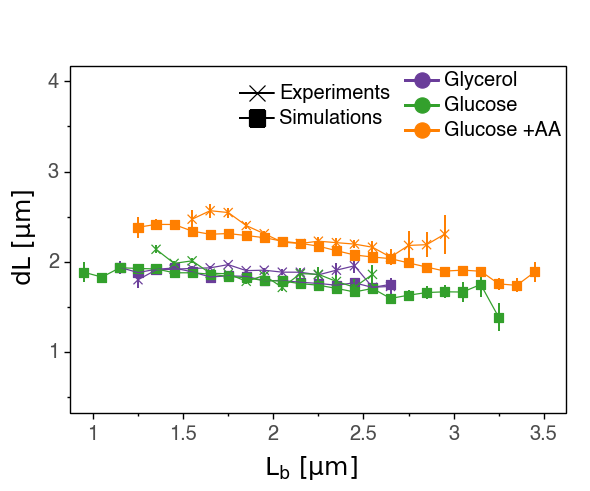

<ggplot: (-9223372036557755504)>


/Users/gw18g940/miniconda3/envs/test_doubleadder/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/gw18g940/miniconda3/envs/test_doubleadder/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../Plots/fig5a.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/Users/gw18g940/miniconda3/envs/test_doubleadder/lib/python3.7/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_summary_bin : Removed 1498 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


In [8]:
psize = 0.8

legendx = r'$\rm{L_b\ [\mu m]}$'
legendy = r'$\rm{dL\ [\mu m]}$'

pn.theme_set(pn.theme_classic(base_size = 18, base_family='Helvetica'))

p = (pn.ggplot()

     +pn.scale_shape_manual(values=['x','s'],name=" ",
                         labels=['Experiments','Simulations'])
     +pn.scale_colour_manual(values=colors1,name="",
                         labels=plot_names)
     +pn.scale_fill_manual(values=colors1,name="",
                         labels=plot_names)
     
     +pn.stat_summary_bin(pn.aes(x='Lb_fit', y = 'DeltaL',color = 'condition', shape = 'datatype'),
                          data=all_data, breaks = np.arange(0,10,0.1),
                          fun_data = mse_fun, size=psize, geom = 'pointrange')
     +pn.stat_summary_bin(pn.aes(x='Lb_fit', y = 'DeltaL',color = 'condition', shape = 'datatype'),
                          data=all_data,breaks = np.arange(0,10,0.1),
                          fun_data = mean_fun, geom = 'line')
     + pn.coord_cartesian(xlim = (1, 3.5),ylim = (0.5, 4))
     + pn.labs(x = legendx,colour = '', y = legendy, font_style = 'normal')
     + pn.guides(fill=False)
     + pn.theme(legend_position = (0.64, 0.83),axis_line_x = pn.element_line(color="black", size = 0.5),
        axis_line_y = pn.element_line(color="black", size = 0.5),
                panel_border = pn.element_rect(colour = "black"),
                legend_background = pn.element_rect(fill = [1,0,0,0]),
                aspect_ratio=0.7,
                legend_entry_spacing=-8,
                legend_box = "horizontal",
               #text=pn.element_text(color = 'red',style='normal')
               )
     

    )
print(p)
pn.ggplot.save(p,folder_prefix+'Plots/fig5a.png',dpi=600)


## Figure 5B

/Users/gw18g940/miniconda3/envs/test_doubleadder/lib/python3.7/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_summary_bin : Removed 2120 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


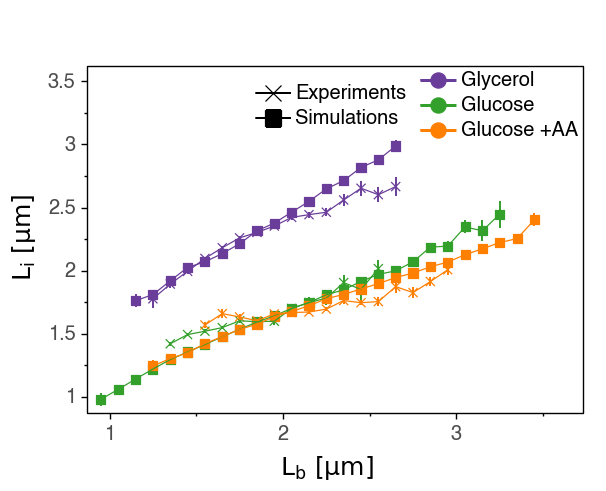

<ggplot: (-9223372036556872206)>


/Users/gw18g940/miniconda3/envs/test_doubleadder/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/gw18g940/miniconda3/envs/test_doubleadder/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../Plots/fig5b.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/Users/gw18g940/miniconda3/envs/test_doubleadder/lib/python3.7/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_summary_bin : Removed 2120 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


In [9]:
psize = 0.8

legendx = r'$\rm{L_b\ [\mu m]}$'
legendy = r'$\rm{L_i\ [\mu m]}$'

pn.theme_set(pn.theme_classic(base_size = 18, base_family='Helvetica'))

p = (pn.ggplot()

     +pn.scale_shape_manual(values=['x','s'],name=" ",
                         labels=['Experiments','Simulations'])
     +pn.scale_colour_manual(values=colors1,name="",
                         labels=plot_names)
     +pn.scale_fill_manual(values=colors1,name="",
                         labels=plot_names)
     
     +pn.stat_summary_bin(pn.aes(x='Lb_fit', y = 'Li_fit',color = 'condition', shape = 'datatype'),
                          data=all_data, breaks = np.arange(0,10,0.1),
                          fun_data = mse_fun, size=psize, geom = 'pointrange')
     +pn.stat_summary_bin(pn.aes(x='Lb_fit', y = 'Li_fit',color = 'condition', shape = 'datatype'),
                          data=all_data,breaks = np.arange(0,10,0.1),
                          fun_data = mean_fun, geom = 'line')
     + pn.coord_cartesian(xlim = (1, 3.6),ylim = (1, 3.5))
     + pn.labs(x = legendx,colour = '', y = legendy, font_style = 'normal')
     + pn.guides(fill=False)
     + pn.theme(legend_position = (0.64, 0.83),axis_line_x = pn.element_line(color="black", size = 0.5),
        axis_line_y = pn.element_line(color="black", size = 0.5),
                panel_border = pn.element_rect(colour = "black"),
                legend_background = pn.element_rect(fill = [1,0,0,0]),
                aspect_ratio=0.7,
                legend_entry_spacing=-8,
                legend_box = "horizontal",
               #text=pn.element_text(color = 'red',style='normal')
               )
     

    )
print(p)
pn.ggplot.save(p,folder_prefix+'Plots/fig5b.png',dpi=600)


## Figure 5D

In [10]:
#import data
origins = pd.read_csv(folder_prefix+'Data_export/Fig5_D.csv')
origins['condition'] = origins.condition.astype(pd.CategoricalDtype(list(plot_names.values()), ordered=True))


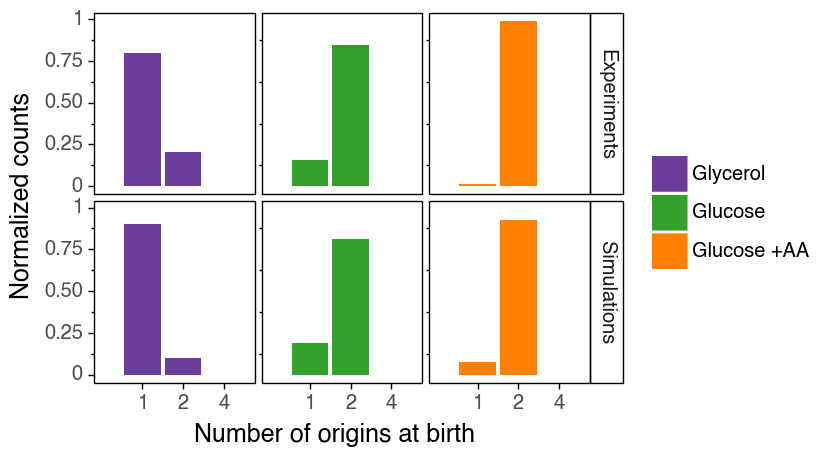

<ggplot: (297856548)>


/Users/gw18g940/miniconda3/envs/test_doubleadder/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/gw18g940/miniconda3/envs/test_doubleadder/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../Plots/fig5d.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


In [11]:
pn.theme_set(pn.theme_classic(base_size = 18, base_family='Helvetica'))

p = (pn.ggplot(origins, pn.aes(x = 'numori_born', y= 'fraction', fill='condition'))
     +pn.geom_col()
     +pn.facet_grid('data_type ~ condition')#, labeller = data_labeller)
     +pn.scale_fill_manual(values=colors1,name=" ",
                         labels=plot_names)
     +pn.theme(strip_text_x = pn.element_blank())
     + pn.labs(x = 'Number of origins at birth',colour = '', y = 'Normalized counts', font_style = 'normal')
     +pn.scale_x_continuous(trans = 'log2', limits = (0.5, 6),breaks=(1,2,4,8))

     + pn.theme(axis_line_x = pn.element_line(color="black", size = 0.5),
        axis_line_y = pn.element_line(color="black", size = 0.5),
                panel_border = pn.element_rect(colour = "black"),
               )
     
    )
print(p)
pn.ggplot.save(p,folder_prefix+'Plots/fig5d.png',dpi=600)



## Figure 5C

In [12]:
#import data
means_stdv = pd.read_csv(folder_prefix+'Data_export/Fig5_C.csv')
means_stdv['condition'] = means_stdv.condition.astype(pd.CategoricalDtype(plot_names.values(), ordered=True))


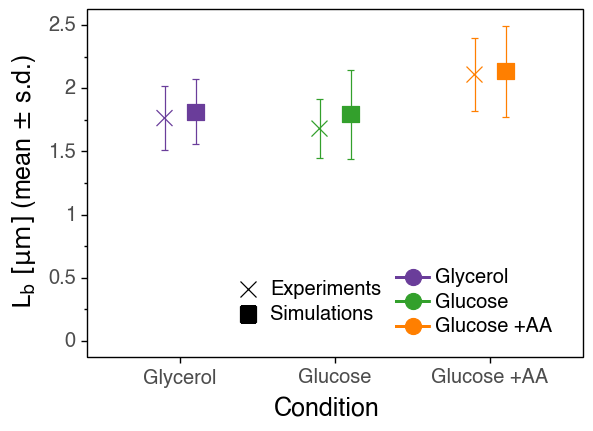

<ggplot: (298510477)>


/Users/gw18g940/miniconda3/envs/test_doubleadder/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/gw18g940/miniconda3/envs/test_doubleadder/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../Plots/fig5c.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


In [14]:
posdodge = pn.position_dodge(width = 0.4)

p = (pn.ggplot(pn.aes(x = 'condition'),data = means_stdv)
     +pn.geom_point(pn.aes(x='condition', y='means',color = 'condition', shape = 'datatype'),
                    size =6,position = posdodge)
     +pn.geom_errorbar(pn.aes(ymin='means-standard',ymax='means+standard',color = 'condition', shape = 'datatype'),
                    data = means_stdv, size =0.5,position = posdodge, width=0.1)
    + pn.scale_shape_manual(values=('x','s'),name=" ",
                         labels=('Experiments','Simulations'))
     +pn.scale_color_manual(values=colors1,name=" ",
                         labels=plot_names)
     +pn.coord_cartesian(ylim = (0, 2.5))
     + pn.labs(x = 'Condition',colour = ' ', y = r'$\rm{L_b\ [\mu m]}$ (mean $\pm$ s.d.)', font_style = 'normal')
     + pn.guides(fill=False)
     + pn.theme(legend_position = (0.6, 0.27),axis_line_x = pn.element_line(color="black", size = 0.5),
        axis_line_y = pn.element_line(color="black", size = 0.5),
                panel_border = pn.element_rect(colour = "black"),
                legend_background = pn.element_rect(fill = [1,1,1,0]),
                aspect_ratio=0.7,
                legend_entry_spacing=-8,
                legend_box = "horizontal",
               #text=pn.element_text(color = 'red',style='normal')
               )
     
    )
print(p)
pn.ggplot.save(p,folder_prefix+'Plots/fig5c.png',dpi=600)
